In [2]:
%load_ext autoreload


%autoreload 2

In [3]:
import numpy as np
import torch
from PIL import Image
from torch.autograd import Variable

from src.get_nets import PNet, RNet, ONet
from src.box_utils import nms, calibrate_box, get_image_boxes, convert_to_square
from src.first_stage import run_first_stage
from src.visualization_utils import show_bboxes

# Load models

In [4]:
pnet = PNet()
rnet = RNet()
onet = ONet()
onet.eval();

# Set hyperparameters

In [5]:
# if this value is too low the algorithm will use a lot of memory
min_face_size = 20.0  

# for probabilities
thresholds = [0.1, 0.5, 0.8]

# for NMS
nms_thresholds=[0.7, 0.7, 0.7]

In [6]:
3+8

11

In [7]:
from matplotlib import pyplot as plt

from src import detect_faces
from PIL import Image
import os
import cv2 
# %aimport -scikit-image
from skimage import transform as trans
import numpy as np
import glob


folder_path= r'C:\Users\123\Desktop\datasets\xyz'
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
output_directory1 = r'C:\Users\123\Desktop\datasets\roiimages\New folder'  # Replace with your desired directory path
output_directory2 = r'C:\Users\123\Desktop\datasets\roiimages\New folder (2)'  # Replace with your desired directory path

os.makedirs(output_directory1, exist_ok=True)
os.makedirs(output_directory2, exist_ok=True)
base_roi_filename='ROI'
j=0
# Process each image in the folder
combined_array=[]
ref_landmarks = np.array([[38.29459953, 51.69630051],
                         [73.53179932, 51.50139999],
                         [56.02519989, 71.73660278],
                         [41.54930115, 92.3655014],
                         [70.72990036, 92.20410156]])

k=0
for k, image_file in enumerate(image_files):
    j+=1
    print(j) 
    # Open the image
    image_path = os.path.join(folder_path, image_file)
    image = Image.open(image_path)
    




    bounding_boxes, landmarks = detect_faces(image)
    #output_array1 = landmarks.reshape(5, 2)
    print(landmarks)
  
    
    
    
    
   
    print(f'length of bounding box = {len(bounding_boxes)}')

    #show_bboxes(image,bounding_boxes,landmarks)
    i=0
    for i,(bbox,row)  in enumerate(zip(bounding_boxes,landmarks)):
        x, y, width, height = bbox[:4]
        print(f"Bounding Box: (x, y) = ({x}, {y}), Width = {width}, Height = {height}")
        # combined_array.append(output_array1)
        # output_array=np.array(combined_array)


        #code portion to be eliminate 

        # Open the JPEG image
        #mage = Image.open('your_image.jpg')

        # Convert the image to a NumPy array
        image_array = np.array(image)

        # Define the bounding box (x, y, width, height)
        # x, y, width, height = 100, 100, 200, 150  # Example bounding box coordinates

        # Extract the ROI using NumPy slicing
        roi = image_array[int(y): int(y)+ ((int(height)-int(y))+5), int(x):int(x)+ ((int(width)-int(x))+5)]
        
        #roi = image.crop (width,  height)

        # Convert the ROI back to a PIL Image if needed
        #roi_image= []
        roi_image = Image.fromarray(roi).resize((112,112),Image.BICUBIC)

        # Display or save the extracted ROI
        # roi_image.show()
        output_array1=np.array([[landmarks[i,0],landmarks[i,5]],
                         [landmarks[i,1],landmarks[i,6]],
                         [landmarks[i,2],landmarks[i,7]],
                         [landmarks[i,3],landmarks[i,8]],
                         [landmarks[i,4],landmarks[i,9]]])


        
        tform = trans.SimilarityTransform()
        
        tform.estimate(output_array1, ref_landmarks)
        # print ("array3")
        tfm = tform.params[0:2, :]
      
        
        # Warp the image to align the face
       
        output = cv2.warpAffine(np.array(image), tfm, (112, 112))
        # print ("array5")
        # Save the aligned face



        roi_image_filename2 = f'{base_roi_filename}_{str(j)+str(i)}.jpg'  # Unique filename for each ROI
        roi_image_path2 = os.path.join(output_directory2, roi_image_filename2)
        roi_image2 = Image.fromarray(roi)  # Convert NumPy array back to a PIL Image
        roi_image2.save(roi_image_path2)

        roi_image_filename1 = f'ROI_{str(j)+str(i)}.jpg'  # Unique filename for each ROI
        roi_image_path1 = os.path.join(output_directory1, roi_image_filename1)
        roi_image1 = Image.fromarray(output)  # Convert NumPy array back to a PIL Image
        print(roi_image_path1)
        roi_image1.save(roi_image_path1)
     
        print(output_array1)
        
       
       

        print(f"ROI {i} saved to: {roi_image_path2}")
        bbox = None

1
[[ 8.892396 26.52807  13.468399 19.47999  33.396366 27.474216 18.685455
  37.818687 51.758602 45.840878]]
length of bounding box = 1
Bounding Box: (x, y) = (0.8019621446728706, -3.565523937344551), Width = 54.53520283848047, Height = 62.27341595478356
C:\Users\123\Desktop\datasets\roiimages\New folder\ROI_10.jpg
[[ 8.892396 27.474216]
 [26.52807  18.685455]
 [13.468399 37.818687]
 [19.47999  51.758602]
 [33.396366 45.840878]]
ROI 0 saved to: C:\Users\123\Desktop\datasets\roiimages\New folder (2)\ROI_10.jpg
2
[[12.891801 36.05054  26.326717 20.235538 41.56383  31.489815 24.639631
  42.63439  56.195248 49.744476]]
length of bounding box = 1
Bounding Box: (x, y) = (0.19337763637304306, -0.12984100729227066), Width = 53.50496527552605, Height = 70.24754626303911
C:\Users\123\Desktop\datasets\roiimages\New folder\ROI_20.jpg
[[12.891801 31.489815]
 [36.05054  24.639631]
 [26.326717 42.63439 ]
 [20.235538 56.195248]
 [41.56383  49.744476]]
ROI 0 saved to: C:\Users\123\Desktop\datasets\roiim

In [4]:
from matplotlib import pyplot as plt

from src import detect_faces
from PIL import Image
import os
import cv2 
# %aimport -scikit-image
from skimage import transform as trans
import numpy as np
import glob


folder_path= r'C:\Users\123\Desktop\datasets\xyz'
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
output_directory1 = r'C:\Users\123\Desktop\datasets\roiimages\New folder'  # Replace with your desired directory path
output_directory2 = r'C:\Users\123\Desktop\datasets\roiimages\New folder (2)'  # Replace with your desired directory path

os.makedirs(output_directory1, exist_ok=True)
os.makedirs(output_directory2, exist_ok=True)
base_roi_filename='ROI'
j=0
# Process each image in the folder
combined_array=[]
ref_landmarks = np.array([[38.29459953, 51.69630051],
                         [73.53179932, 51.50139999],
                         [56.02519989, 71.73660278],
                         [41.54930115, 92.3655014],
                         [70.72990036, 92.20410156]])

k=0
for k, image_file in enumerate(image_files):
    j+=1
    print(j) 
    # Open the image
    image_path = os.path.join(folder_path, image_file)
    image = Image.open(image_path)
    




    bounding_boxes, landmarks = detect_faces(image)
    #output_array1 = landmarks.reshape(5, 2)
    print(landmarks)
  
    
    
    
    
   
    print(f'length of bounding box = {len(bounding_boxes)}')

    #show_bboxes(image,bounding_boxes,landmarks)
    i=0
    for i,(bbox,row)  in enumerate(zip(bounding_boxes,landmarks)):
        x, y, width, height = bbox[:4]
        print(f"Bounding Box: (x, y) = ({x}, {y}), Width = {width}, Height = {height}")
        # combined_array.append(output_array1)
        # output_array=np.array(combined_array)


        #code portion to be eliminate 

        # Open the JPEG image
        #mage = Image.open('your_image.jpg')

        # Convert the image to a NumPy array
        image_array = np.array(image)

        # Define the bounding box (x, y, width, height)
        # x, y, width, height = 100, 100, 200, 150  # Example bounding box coordinates

        # Extract the ROI using NumPy slicing
        roi = image_array[int(y): int(y)+ ((int(height)-int(y))+5), int(x):int(x)+ ((int(width)-int(x))+5)]
        
        #roi = image.crop (width,  height)

        # Convert the ROI back to a PIL Image if needed
        #roi_image= []
        roi_image = Image.fromarray(roi).resize((112,112),Image.BICUBIC)

        # Display or save the extracted ROI
        # roi_image.show()
        output_array1=np.array([[landmarks[i,0],landmarks[i,5]],
                         [landmarks[i,1],landmarks[i,6]],
                         [landmarks[i,2],landmarks[i,7]],
                         [landmarks[i,3],landmarks[i,8]],
                         [landmarks[i,4],landmarks[i,9]]])


        
        tform = trans.SimilarityTransform()
        
        tform.estimate(output_array1, ref_landmarks)
        # print ("array3")
        tfm = tform.params[0:2, :]
      
        
        # Warp the image to align the face
       
        output = cv2.warpAffine(np.array(image), tfm, (112, 112))
        # print ("array5")
        # Save the aligned face



        roi_image_filename2 = f'{base_roi_filename}_{str(j)+str(i)}.jpg'  # Unique filename for each ROI
        roi_image_path2 = os.path.join(output_directory2, roi_image_filename2)
        roi_image2 = Image.fromarray(roi)  # Convert NumPy array back to a PIL Image
        roi_image2.save(roi_image_path2)

        roi_image_filename1 = f'ROI_{str(j)+str(i)}.jpg'  # Unique filename for each ROI
        roi_image_path1 = os.path.join(output_directory1, roi_image_filename1)
        roi_image1 = Image.fromarray(output)  # Convert NumPy array back to a PIL Image
        print(roi_image_path1)
        roi_image1.save(roi_image_path1)
     
        print(output_array1)
        
       
       

        print(f"ROI {i} saved to: {roi_image_path2}")
        bbox = None

ModuleNotFoundError: No module named 'mtcnn_pytorch'

In [10]:
from src import detect_faces
from PIL import Image
import os
import cv2 
# %aimport -scikit-image
from skimage import transform as trans
import numpy as np
import glob

# Define the image folder and the output directory
image_folder = r'C:\Users\123\Desktop\datasets\roiimages\New folder'
output_directory = r'C:\Users\123\Desktop\datasets\roiimages'
os.makedirs(output_directory, exist_ok=True)

# Define reference landmarks for alignment
ref_landmarks = np.array([[38.29459953, 51.69630051],
                         [73.53179932, 51.50139999],
                         [56.02519989, 71.73660278],
                         [41.54930115, 92.3655014],
                         [70.72990036, 92.20410156]])

# Use glob to get the list of image file paths
image_pattern = os.path.join(image_folder, '*.jpg')
image_paths = glob.glob(image_pattern)

image = Image.open(image_paths[0])

bounding_boxes, landmarks = detect_faces(image)
landmarks_array=np.array([[landmarks[0,0],landmarks[0,5]],
                         [landmarks[0,1],landmarks[0,6]],
                         [landmarks[0,2],landmarks[0,7]],
                         [landmarks[0,3],landmarks[0,8]],
                         [landmarks[0,4],landmarks[0,9]]])


tform = trans.SimilarityTransform()
tform.estimate(landmarks_array, ref_landmarks)
tfm = tform.params[0:2, :]
output = cv2.warpAffine(np.array(image), tfm, (112, 112))

roi_image_filename = f'ROI_{1}.jpg'  # Unique filename for each ROI
roi_image_path = os.path.join(output_directory, roi_image_filename)

roi_image = Image.fromarray(output)  # Convert NumPy array back to a PIL Image
# print(roi_image_path)
# roi_image.save(roi_image_path)


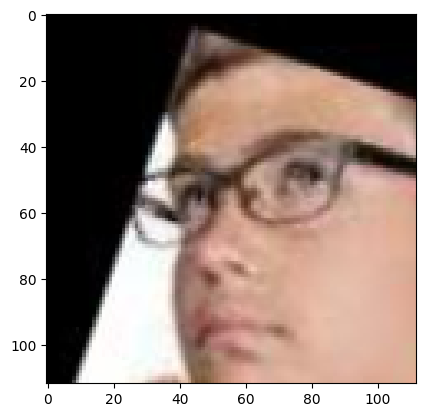

In [11]:
from matplotlib import pyplot as plt
plt.imshow(output)

In [ ]:
from skimage import transform as trans

# Create a SimilarityTransform object
tform = trans.SimilarityTransform()
x1=43.675634
x2=50.4678
x3=60
x4=47
x5=55.678
y1=43.78
y2=50
y3=60.5673573
y4=47.678
y5=55


u1=65
u2=77.67
u3=65
u4=76
u5=57.4678678
v1=46
v2=69.5678
v3=34.567
v4=45.467
v5=88
# Define source and destination points
src = [[x1, y1], [x2, y2],[x3, y3], [x4, y4],[x5, y5] ]  # Source points
dst = [[u1, v1], [u2, v2], [u1, v1], [u2, v2],[u2, v2]]  # Destination points

# Estimate the similarity transformation
tform.estimate(src, dst)

True

*******************************************************************************************

In [12]:
# from src import detect_faces
# from PIL import Image
# import os
# import cv2
# from skimage import transform as trans
# import numpy as np
# import glob

# # Define the image folder and the output directory
# image_folder = r'C:\Users\123\Desktop\datasets\roiimages\New folder'
# output_directory = r'C:\Users\123\Desktop\datasets\xyz'
# os.makedirs(output_directory, exist_ok=True)

# # Define reference landmarks for alignment
# ref_landmarks = np.array([[38.29459953, 51.69630051],
#                          [73.53179932, 51.50139999],
#                          [56.02519989, 71.73660278],
#                          [41.54930115, 92.3655014],
#                          [70.72990036, 92.20410156]])

# # Use glob to get the list of image file paths
# image_pattern = os.path.join(image_folder, '*.jpg')
# image_paths = glob.glob(image_pattern)

# for i, (image_path, array) in enumerate(zip(image_paths, output_array)):
#     # bounding_boxes, landmarks = detect_faces(image)
#     image = Image.open(image_path)

#     print(array)
#     print("array")

#     # Calculate the centroids of the two sets of landmarks
#     centroid_array = np.mean(array, axis=0)
#     centroid_ref = np.mean(ref_landmarks, axis=0)

#     # Calculate the angle between the centroids
#     angle = np.arctan2(centroid_ref[1] - centroid_array[1], centroid_ref[0] - centroid_array[0])

#     # Convert the angle from radians to degrees
#     angle_degrees = np.degrees(angle)

#     # Rotate the image using the calculated angle
#     tform = trans.SimilarityTransform(rotation=np.deg2rad(angle_degrees))
#     rotated_image = trans.warp(np.array(image), tform.inverse)

#     # Warp the image to align the face
#     tfm = trans.SimilarityTransform()
#     # tfm.estimate(array, ref_landmarks)  # Estimate transformation
#     output = cv2.warpAffine(rotated_image, tfm.params[0:2, :], (112,112))

#     # Ensure that the output array has a valid shape and data type
#     if output.shape == (112,112):
#         # Convert the NumPy array to a valid PIL Image
#         roi_image = Image.fromarray((output * 255).astype(np.uint8))
        
#         # Save the aligned face
#         roi_image_filename = f'ROI_{i}.jpg'  # Unique filename for each ROI
#         roi_image_path = os.path.join(output_directory, roi_image_filename)
#         roi_image.save(roi_image_path)
#         print("enddddd")
#         print("arr6ay")
#     else:
#         print(f"Invalid output shape: {output.shape}")

# print("Alignment and saving completed.")


NameError: name 'output_array' is not defined

In [ ]:
# from src import detect_faces
# from PIL import Image
# import os
# import cv2 
# # %aimport -scikit-image
# from skimage import transform as trans
# import numpy as np
# import glob

# # Define the image folder and the output directory
# image_folder = r'C:\Users\123\Desktop\datasets\roiimages\New folder'
# output_directory = r'C:\Users\123\Desktop\datasets\xyz'
# os.makedirs(output_directory, exist_ok=True)

# # Define reference landmarks for alignment
# ref_landmarks = np.array([[38.29459953, 51.69630051],
#                          [73.53179932, 51.50139999],
#                          [56.02519989, 71.73660278],
#                          [41.54930115, 92.3655014],
#                          [70.72990036, 92.20410156]])

# # Use glob to get the list of image file paths
# image_pattern = os.path.join(image_folder, '*.jpg')
# image_paths = glob.glob(image_pattern)

# for i,  (image_path,array) in enumerate(zip(image_paths,output_array)):
#     # bounding_boxes, landmarks = detect_faces(image)
#     image = Image.open(image_path)
    
#     print (array)
    
#     print ("array")

#     # Perform face detection to get landmarks
#     # Note: You need to implement the detect_faces function or use an appropriate face detection method
#     # bounding_boxes, landmarks = detect_faces(image)

#     # For this example, I'll simulate detected landmarks
#     # Replace this with actual detected landmarks
    
       

    
#     tform = trans.SimilarityTransform()
#     print ("arr1ay")
#     tform.estimate(array, ref_landmarks)
#     print ("arr2ay")
#     tfm = tform.params[0:2, :]
#     print ("ar4ay")
    
#     # Warp the image to align the face
#     output = cv2.warpAffine(np.array(image), tfm, (112, 112))
#     print ("arr5ay")
#     # Save the aligned face
#     roi_image_filename = f'ROI_{i}.jpg'  # Unique filename for each ROI
#     roi_image_path = os.path.join(output_directory, roi_image_filename)
#     roi_image = Image.fromarray(output)  # Convert NumPy array back to a PIL Image
#     roi_image.save(roi_image_path)
#     print("enddddd")
#     print ("arr6ay")

# print("Alignment and saving completed.")


# updated code of sir mohsins code

In [ ]:
import glob
import os


# Replace 'your_image_folder' with the path to your image directory
image_folder = r'C:\Users\123\Desktop\datasets\roiimages\New folder'

# Define the image file pattern (e.g., to match .jpg and .png files)
image_pattern = os.path.join(image_folder, '*.jpg')

# Use glob to get the list of image file paths
image_paths = glob.glob(image_pattern)

In [ ]:
# import os
# import cv2
# import numpy as np
# import glob

# # Replace 'your_image_folder' with the path to your image directory
# image_folder = r'C:\Users\123\Desktop\datasets\roiimages\New folder'

# # Define the image file pattern (e.g., to match .jpg and .png files)
# image_pattern = os.path.join(image_folder, '*.jpg')

# # Use glob to get the list of image file paths
# image_paths = glob.glob(image_pattern)

# # Define the alignment settings
# img_size = (80, 70)
# coord5point = np.array([[38.29459953, 51.69630051],
#                          [73.53179932, 51.50139999],
#                          [56.02519989, 71.73660278],
#                          [41.54930115, 92.3655014],
#                          [70.72990036, 92.20410156]])
# # Define a function for face alignment with a perspective transformation
# def align_faces(image_paths):
#     for i, image_path in enumerate(image_paths):
#         print(f'Aligning the {i+1}th ROI image: {image_path}')
         
#         # Load and crop the ROI image
#         img = cv2.imread(image_path)
#         if img is not None:
#             # Define the source and destination points for the perspective transformation
#             #src_points = np.float32(coord5point)
#             #dst_points = np.float32([[0, 0], [img_size[0], 0], [0, img_size[1]], [img_size[0], img_size[1]]])
#             src_points = np.float32(coord5point)  # Use your source points
#             dst_points = output_array

#             print(src_points)
#             print(dst_points)

#              # Define the target rectangle as a quadrilateral with four points


#             # Estimate the perspective transformation between the ROI landmarks and the target rectangle
#             transf = cv2.getPerspectiveTransform(src_points, dst_points)

#             if transf is not None:
#                 # Perform the warpPerspective operation to align the ROI image using the perspective transformation
#                 aligned_roi_img = cv2.warpPerspective(img, transf, img_size)
                
#                 # Save the aligned ROI image
#                 s_path_str, name_with_ext = os.path.split(image_path)
#                 name, ext = os.path.splitext(name_with_ext)
#                 t_path_str = s_path_str + '-aligned'
#                 if not os.path.exists(t_path_str):
#                     os.makedirs(t_path_str)
#                 output_path = os.path.join(t_path_str, f"{name}.jpg")
#                 cv2.imwrite(output_path, aligned_roi_img)

# align_faces(image_paths)


# Load an image

In [ ]:
# import os
# import cv2
# import numpy as np
# import glob

# #Replace 'your_image_folder' with the path to your image directory'
# image_folder = r'C:\Users\123\Desktop\datasets\roiimages\New folder'

# # Define the image file pattern (e.g., to match .jpg and .png files)
# image_pattern = os.path.join(image_folder, '*.jpg')

# # Use glob to get the list of image file paths
# image_paths = glob.glob(image_pattern)

# # Print the list of image paths
# #for path in image_paths:
# # print(path)













# # Define the alignment settings
# import numpy as np

# # Define the original image size
# original_img_size = (112,112)

# # Define the original reference points
# coord5point = np.array([[38.29459953, 51.69630051],
#                            [73.53179932, 51.50139999],
#                            [56.02519989, 71.73660278],
#                            [41.54930115, 92.3655014 ],
#                            [70.72990036, 92.20410156]])





# # Define a function for face alignment
# def align_faces(image_paths):
#     image_paths=image_paths
#     for i, image_paths in enumerate(image_paths):
#         print(f'Aligning the {i+1}th ROI image: {image_paths}')
         
#         # Load and crop the ROI image
#         img = cv2.imread(image_paths)
#         if img is not None:
#             # You need to adjust the following lines to handle ROI alignment
#             # Estimate the transformation between the ROI landmarks and coord5point
#             # Perform the warpAffine operation to align the ROI image
#             # Save the aligned ROI image to a new location

#             # For the purpose of this example, we assume that you have the
#             # necessary alignment code for ROI images.
#             # Replace the following lines with your alignment code:
#             transf = cv2.estimateAffinePartial2D( output_array,coord5point)
#             if transf is not None:
#                 aligned_roi_img = cv2.warpAffine(img, transf[0], img_size)

#                 # Save the aligned ROI image
#                 s_path_str, name_with_ext = os.path.split(image_paths)
#                 name, ext = os.path.splitext(name_with_ext)

#                 t_path_str = s_path_str + '-aligned'
#                 if not os.path.exists(t_path_str):
#                     os.makedirs(t_path_str)

#                 output_path = os.path.join(t_path_str, f"{name}.jpg")
#                 cv2.imwrite(output_path, aligned_roi_img)

# align_faces(image_paths)


updated code

In [ ]:
from src import detect_faces
from PIL import Image
import os
import cv2
import numpy as np

folder_path = r'C:\Users\123\Desktop\datasets\xyz'
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
output_directory = r'C:\Users\123\Desktop\datasets\roiimages\New folder'
os.makedirs(output_directory, exist_ok=True)
base_roi_filename = 'ROI'
j = 0

# Define the affine transformation matrix
affine_matrix = np.array([[0.5, 0, 0],
                          [0, 0.5, 0]])

# Process each image in the folder
for image_file in image_files:
    j += 1
    image_path = os.path.join(folder_path, image_file)
    image = Image.open(image_path)

    bounding_boxes, landmarks = detect_faces(image)
    print(f'Number of detected faces: {len(bounding_boxes)}')

    for i, bbox in enumerate(bounding_boxes, start=1):
        x, y, width, height = bbox[:4]
        print(f"Bounding Box {i}: (x, y) = ({x}, {y}), Width = {width}, Height = {height}")

        # Calculate the affine transformation for this face
        transformation = np.array([[landmarks[0,i] - x, landmarks[0,i+5] - y] for i in range(5)])
        transformation = np.dot(transformation, affine_matrix.T)

        # Apply the affine transformation to align and extract the ROI
        roi = cv2.warpAffine(np.array(image), transformation, (220, 220))

        # Display or save the aligned ROI
        roi_image = Image.fromarray(roi)
        roi_image.show()

        roi_image_filename = f'{base_roi_filename}_{str(j)}_{i}.jpg'
        roi_image_path = os.path.join(output_directory, roi_image_filename)
        roi_image.save(roi_image_path)

        print(f"ROI {i} saved to: {roi_image_path}")


Number of detected faces: 1
Bounding Box 1: (x, y) = (138.62454062700272, 28.571920156478882), Width = 207.04693186283112, Height = 107.39550757408142


ValueError: shapes (5,2) and (3,2) not aligned: 2 (dim 1) != 3 (dim 0)

In [ ]:
print(landmarks) 

print(landmarks)

[[156.9941   182.72408  175.95882  175.73799  195.13326   69.2834
   54.315155  75.690025  94.8307    83.84836 ]]
[[156.9941   182.72408  175.95882  175.73799  195.13326   69.2834
   54.315155  75.690025  94.8307    83.84836 ]]


In [ ]:
import glob

# Replace 'your_image_folder' with the path to your image directory
image_folder = r'C:\Users\123\Desktop\datasets\roiimages'

# Define the image file pattern (e.g., to match .jpg and .png files)
image_pattern = os.path.join(image_folder, '*.jpg')

# Use glob to get the list of image file paths
image_paths = glob.glob(image_pattern)

# Print the list of image paths
#for path in image_paths:
   # print(path)




In [ ]:
from matplotlib import pyplot as plt
print(bbox)
print(image_array.shape)

# a = image_array[21:21+48, 453:453+48, :]
# a = image_array[436:21+48, 453:453+48, :]
plt.imshow(a)

NameError: name 'bbox' is not defined

In [ ]:
import cv2
import os

# Load the image


# Define a list to store bounding box values
#bounding_boxes = []

# Define and add multiple bounding boxes to the list
#bbox1 = (100, 100, 200, 150)  # Example bounding box 1 coordinates (x, y, width, height)
#bbox2 = (300, 200, 120, 100)  # Example bounding box 2 coordinates (x, y, width, height)
#bounding_boxes.append(bbox1)
#bounding_boxes.append(bbox2)

# Access the values of individual bounding boxes
output_directory = r'C:\Users\123\Desktop\datasets\roiimages'  # Replace with your desired directory path
os.makedirs(output_directory, exist_ok=True)
base_roi_filename='ROI'
i=0
for bbox in bounding_boxes:

        i=  i+1
    
        x, y, width, height = bbox[:4]
        print(f"Bounding Box: (x, y) = ({x}, {y}), Width = {width}, Height = {height}")
        


        # Open the JPEG image
        #mage = Image.open('your_image.jpg')

        # Convert the image to a NumPy array
        image_array = np.array(image)

        # Define the bounding box (x, y, width, height)
        # x, y, width, height = 100, 100, 200, 150  # Example bounding box coordinates

        # Extract the ROI using NumPy slicing
        roi = image_array[int(y): int(y)+ ((int(height)-int(y))+5), int(x):int(x)+ ((int(width)-int(x))+5)]
        
        #roi = image.crop (width,  height)

        # Convert the ROI back to a PIL Image if needed
        #roi_image= []
        roi_image = Image.fromarray(roi).resize((220,220),Image.BICUBIC )

        # Display or save the extracted ROI
        roi_image.show()
        
        roi_image_filename = f'{base_roi_filename}_{i}.jpg'  # Unique filename for each ROI
        roi_image_path = os.path.join(output_directory, roi_image_filename)
        roi_image = Image.fromarray(roi)  # Convert NumPy array back to a PIL Image
        roi_image.save(roi_image_path)

        print(f"ROI {i} saved to: {roi_image_path}")


    


 

# Define the directory and file names




Bounding Box: (x, y) = (119.1721730530262, 39.15938436985016), Width = 175.34824132919312, Height = 111.24765029549599
ROI 1 saved to: C:\Users\123\Desktop\datasets\roiimages\ROI_1.jpg


In [ ]:
image = Image.open('images/office5.jpg')
image

NameError: name 'Image' is not defined

# build an image pyramid

In [ ]:
width, height = image.size
min_length = min(height, width)

min_detection_size = 12
factor = 0.707  # sqrt(0.5)

# scales for scaling the image
scales = []

# scales the image so that
# minimum size that we can detect equals to
# minimum face size that we want to detect
m = min_detection_size/min_face_size
min_length *= m

factor_count = 0
while min_length > min_detection_size:
    scales.append(m*factor**factor_count)
    min_length *= factor
    factor_count += 1

print('scales:', ['{:.2f}'.format(s) for s in scales])
print('number of different scales:', len(scales))

scales: ['0.80', '0.57', '0.40', '0.28', '0.20', '0.14', '0.10', '0.07', '0.05', '0.04']
number of different scales: 10


# P-Net

In [ ]:
bounding_boxes = []

# run P-Net on different scales
for s in scales:
    boxes = run_first_stage(image, pnet, scale=s, threshold=thresholds[0])
    bounding_boxes.append(boxes)

# collect boxes (and offsets, and scores) from different scales
bounding_boxes = [i for i in bounding_boxes if i is not None]
bounding_boxes = np.vstack(bounding_boxes)
print('number of bounding boxes:', len(bounding_boxes))

number of bounding boxes: 338


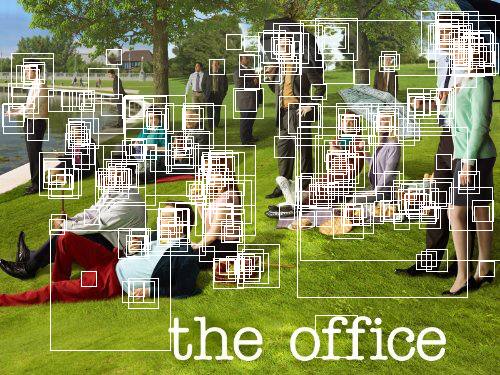

In [ ]:
show_bboxes(image, bounding_boxes)

# NMS + calibration

In [ ]:
keep = nms(bounding_boxes[:, 0:5], nms_thresholds[0])
bounding_boxes = bounding_boxes[keep]

# use offsets predicted by pnet to transform bounding boxes
bounding_boxes = calibrate_box(bounding_boxes[:, 0:5], bounding_boxes[:, 5:])
# shape [n_boxes, 5]

bounding_boxes = convert_to_square(bounding_boxes)
bounding_boxes[:, 0:4] = np.round(bounding_boxes[:, 0:4])
print('number of bounding boxes:', len(bounding_boxes))

number of bounding boxes: 338


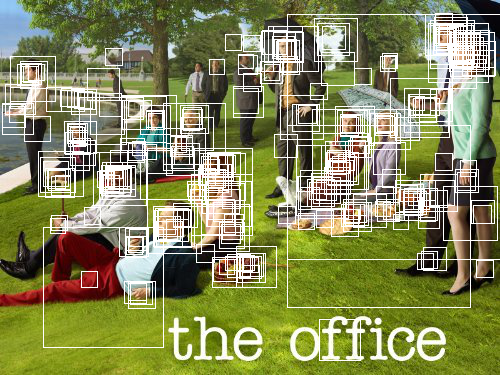

In [ ]:
show_bboxes(image, bounding_boxes)

# R-Net

In [ ]:
img_boxes = get_image_boxes(bounding_boxes, image, size=24)
img_boxes = Variable(torch.FloatTensor(img_boxes), volatile=True)
output = rnet(img_boxes)
offsets = output[0].data.numpy()  # shape [n_boxes, 4]
probs = output[1].data.numpy()  # shape [n_boxes, 2]

In [ ]:
keep = np.where(probs[:, 1] > thresholds[1])[0]
bounding_boxes = bounding_boxes[keep]
bounding_boxes[:, 4] = probs[keep, 1].reshape((-1,))
offsets = offsets[keep]

print('number of bounding boxes:', len(bounding_boxes))

number of bounding boxes: 71


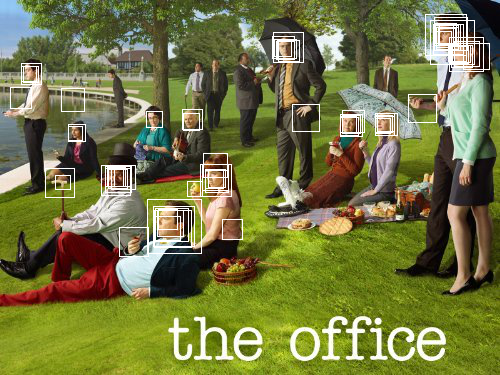

In [ ]:
show_bboxes(image, bounding_boxes)

# NMS + calibration

In [ ]:
keep = nms(bounding_boxes, nms_thresholds[1])
bounding_boxes = bounding_boxes[keep]
bounding_boxes = calibrate_box(bounding_boxes, offsets[keep])
bounding_boxes = convert_to_square(bounding_boxes)
bounding_boxes[:, 0:4] = np.round(bounding_boxes[:, 0:4])
print('number of bounding boxes:', len(bounding_boxes))

number of bounding boxes: 58


In [ ]:
show_bboxes(image, bounding_boxes)

# O-Net

In [ ]:
img_boxes = get_image_boxes(bounding_boxes, image, size=48)
img_boxes = Variable(torch.FloatTensor(img_boxes), volatile=True)
output = onet(img_boxes)
landmarks = output[0].data.numpy()  # shape [n_boxes, 10]
offsets = output[1].data.numpy()  # shape [n_boxes, 4]
probs = output[2].data.numpy()  # shape [n_boxes, 2]

In [ ]:
keep = np.where(probs[:, 1] > thresholds[2])[0]
bounding_boxes = bounding_boxes[keep]
bounding_boxes[:, 4] = probs[keep, 1].reshape((-1,))
offsets = offsets[keep]
landmarks = landmarks[keep]

# compute landmark points
width = bounding_boxes[:, 2] - bounding_boxes[:, 0] + 1.0
height = bounding_boxes[:, 3] - bounding_boxes[:, 1] + 1.0
xmin, ymin = bounding_boxes[:, 0], bounding_boxes[:, 1]
landmarks[:, 0:5] = np.expand_dims(xmin, 1) + np.expand_dims(width, 1)*landmarks[:, 0:5]
landmarks[:, 5:10] = np.expand_dims(ymin, 1) + np.expand_dims(height, 1)*landmarks[:, 5:10]
    
print('number of bounding boxes:', len(bounding_boxes))

number of bounding boxes: 42


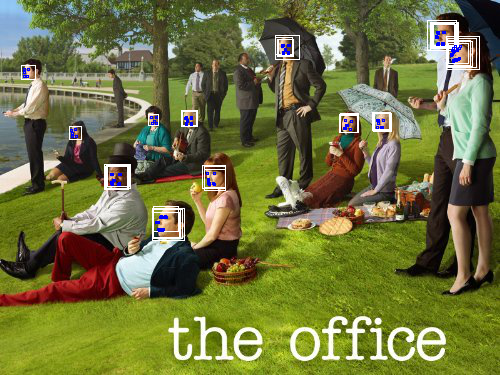

In [ ]:
show_bboxes(image, bounding_boxes, landmarks)

# NMS + calibration

In [ ]:
bounding_boxes = calibrate_box(bounding_boxes, offsets)
keep = nms(bounding_boxes, nms_thresholds[2], mode='min')
bounding_boxes = bounding_boxes[keep]
landmarks = landmarks[keep]
print('number of bounding boxes:', len(bounding_boxes))

number of bounding boxes: 12


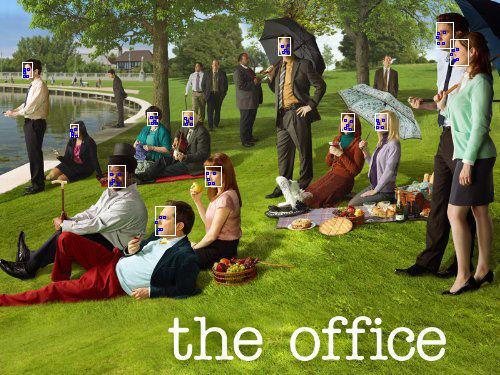

In [ ]:
show_bboxes(image, bounding_boxes, landmarks)